In [1]:
using Random
using Distributions
using StatsPlots
diststring(dist) = replace(string(dist), r"\{.*\}"=>"")

function sim(; dist_true=Gamma(20, 1/20), n = 100, L = 10^5)
    sample = Vector{Float64}(undef, n)
    AIC_normal0 = Vector{Float64}(undef, L)
    AIC_normal1 = similar(AIC_normal0)
    AIC_normal2 = similar(AIC_normal0)
    for i in 1:L
        rand!(dist_true, sample)
        normal0 = Normal(mean(dist_true), std(dist_true))
        normal1 = Normal(mean(sample), std(dist_true))
        normal2 = Normal(mean(sample), std(sample))
        AIC_normal0[i] = -2loglikelihood(normal0, sample)
        AIC_normal1[i] = -2loglikelihood(normal1, sample) + 1
        AIC_normal2[i] = -2loglikelihood(normal2, sample) + 2
    end
    AIC_normal0, AIC_normal1, AIC_normal2
end

function sim_and_plot(; dist_true=dist_true, n = 100, L = 10^5)
    AIC_normal0, AIC_normal1, AIC_normal2 = sim(; dist_true, n, L)
    
    Selected_from_012 = zeros(Int, 3)
    for i in 1:L
        Selected_from_012[argmin((AIC_normal0[i], AIC_normal1[i], AIC_normal2[i]))] += 1
    end
    group = ["normal0", "normal1", "normal2"]
    P1 = bar(group, Selected_from_012/L; label="", group, color=(1:3)')
    title!("$(diststring(dist_true)), n = $n"; titlefontsize=9)
    plot!(; ylim = (-0.01, 0.7))

    Selected_from_01 = zeros(Int, 2)
    for i in 1:L
        Selected_from_01[argmin((AIC_normal0[i], AIC_normal1[i]))] += 1
    end
    group = ["normal0", "normal1"]
    P2 = bar(group, Selected_from_01/L; label="", group, color=(1:2)')
    plot!(; ylim = (-0.01, 0.7))

    Selected_from_02 = zeros(Int, 2)
    for i in 1:L
        Selected_from_02[argmin((AIC_normal0[i], AIC_normal2[i]))] += 1
    end
    group = ["normal0", "normal2"]
    P3 = bar(group, Selected_from_02/L; label="", group, color=[1,3]')
    plot!(; ylim = (-0.01, 0.7))

    Selected_from_12 = zeros(Int, 2)
    for i in 1:L
        Selected_from_12[argmin((AIC_normal1[i], AIC_normal2[i]))] += 1
    end
    group = ["normal1", "normal2"]
    P4 = bar(group, Selected_from_12/L; label="", group, color=(2:3)')
    plot!(; ylim = (-0.01, 0.7))
    
    plot(P1, P2, P3, P4; size=(800, 300), layout=@layout[a{0.333w} b c d])
end

function sim_and_plot2(k; n = 100, L = 10^5)
    dist_true = Gamma(k, 1/k)
    normal0 = Normal(mean(dist_true), round(std(dist_true), digits=3))
    A = sim_and_plot(; n, L, dist_true)
    B = sim_and_plot(; n, L, dist_true = normal0)
    plot(A, B; size=(800, 600), layout=(2, 1))
end

sim_and_plot2 (generic function with 1 method)

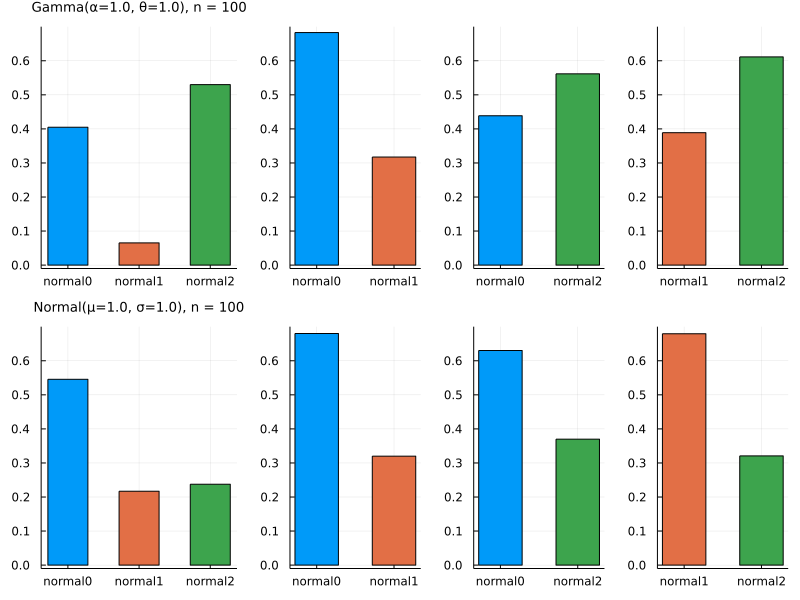

In [2]:
sim_and_plot2(1)

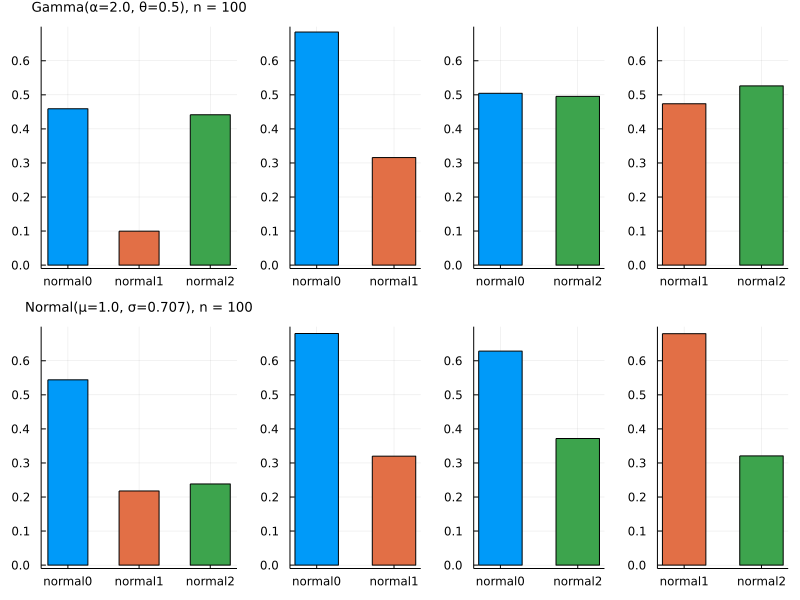

In [3]:
sim_and_plot2(2)

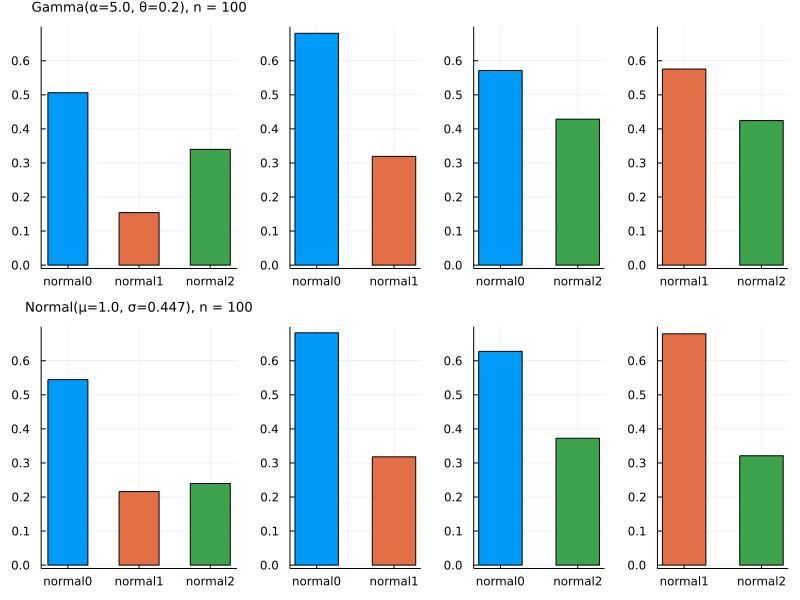

In [4]:
sim_and_plot2(5)

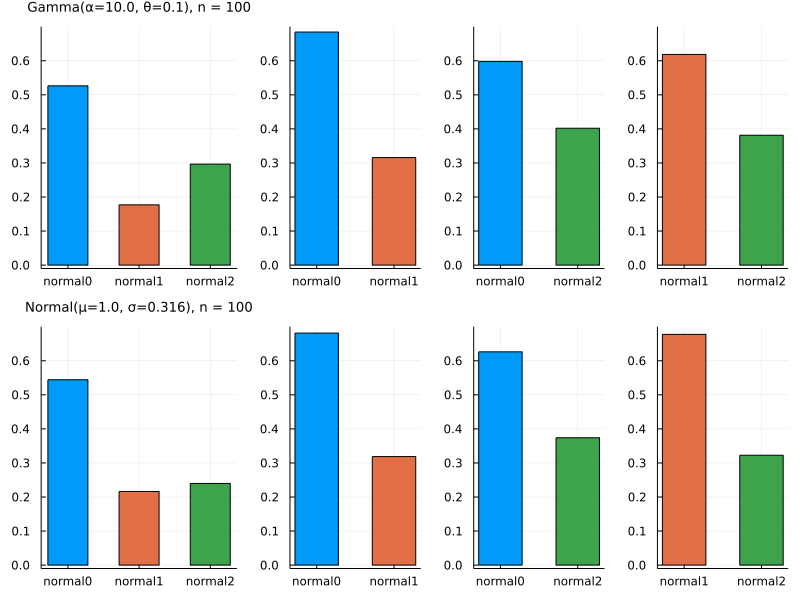

In [5]:
sim_and_plot2(10)

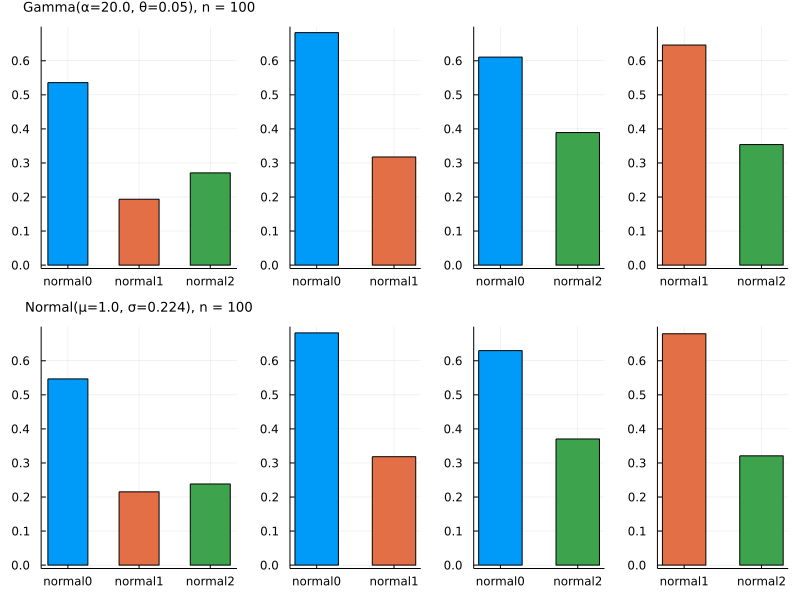

In [6]:
sim_and_plot2(20)

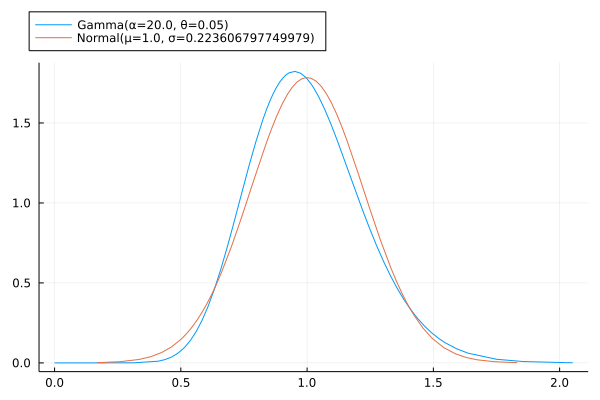

In [7]:
dist_true = Gamma(20, 1/20)
normal0 = Normal(mean(dist_true), std(dist_true))
plot(dist_true; label="$(diststring(dist_true))")
plot!(normal0; label="$(diststring(normal0))")
plot!(; legend=:outertop)